# Running FI t-SNE implementation

IMPORTANT: The `fast_tsne` binary and `fast_tsne.py` Python wrapper should be in the same folder as this notebook

In [1]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns; sns.set()

import fast_tsne

In [2]:
# Load MNIST data

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
print(X.shape)

X = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X, full_matrices=False)
X50 = np.dot(U, np.diag(s))[:,:50]
PCAinit = X50[:,:2] / np.std(X50[:,0]) * 0.0001

np.random.seed(42)
ind1k = np.random.choice(X.shape[0], 1000, replace=False)
ind5k = np.random.choice(X.shape[0], 5000, replace=False)

col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

Using TensorFlow backend.


(70000, 784)


<IPython.core.display.Javascript object>


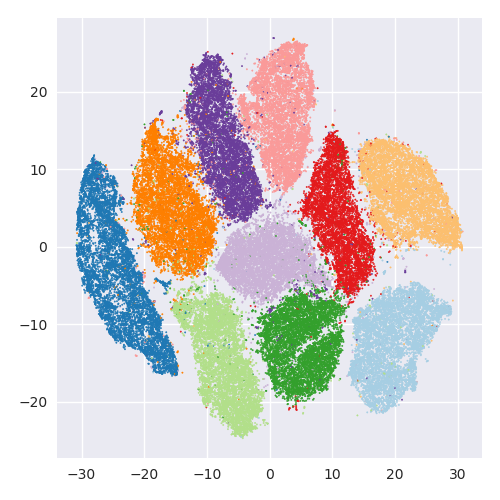

In [3]:
# Run t-SNE on the full MNIST

Z = fast_tsne.fast_tsne(X50, perplexity=50, stop_lying_iter=500, initialization=PCAinit)

plt.figure(figsize=(5,5))
plt.scatter(Z[:,0], Z[:,1], c=col[y], s=1)
plt.tight_layout()

## Checking that various other options work correctly

### 1-dimensional projection

<IPython.core.display.Javascript object>


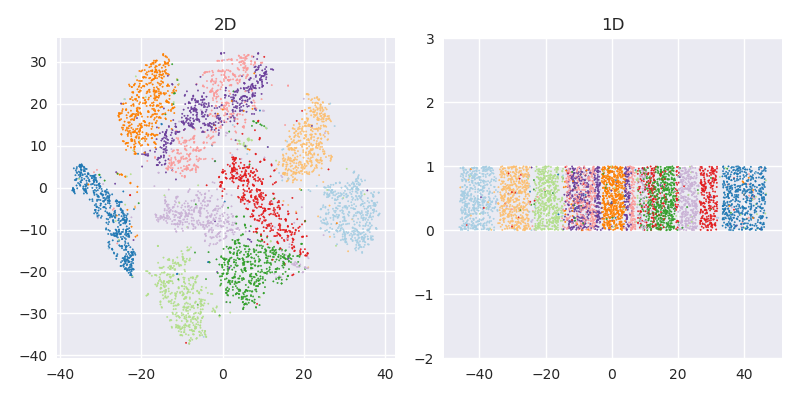

In [28]:
Z1 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:])

Z2 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:], map_dims=1)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('2D')
plt.subplot(122)
plt.scatter(Z2[:,0], np.random.uniform(size=Z2.shape[0]), c=col[y[ind5k]], s=1)
plt.ylim([-2,3])
plt.title('1D')
plt.tight_layout()

### VP tree vs ANNOY

<IPython.core.display.Javascript object>


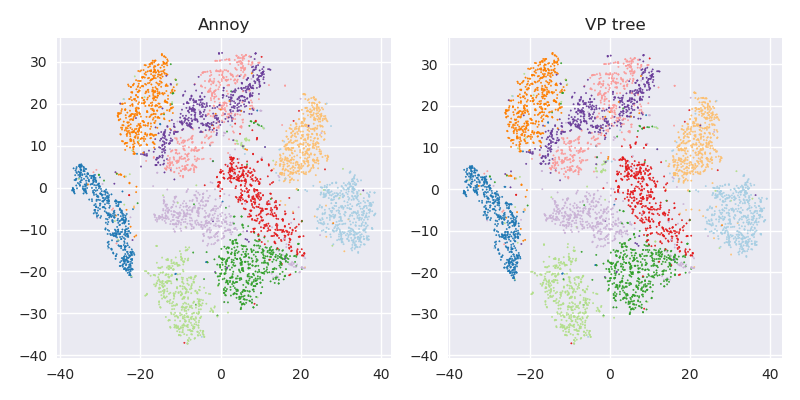

In [7]:
Z1 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:])

Z2 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:], knn_algo='vp-tree')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Annoy')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('VP tree')
plt.tight_layout()

### Barnes-Hut vs FFT

<IPython.core.display.Javascript object>


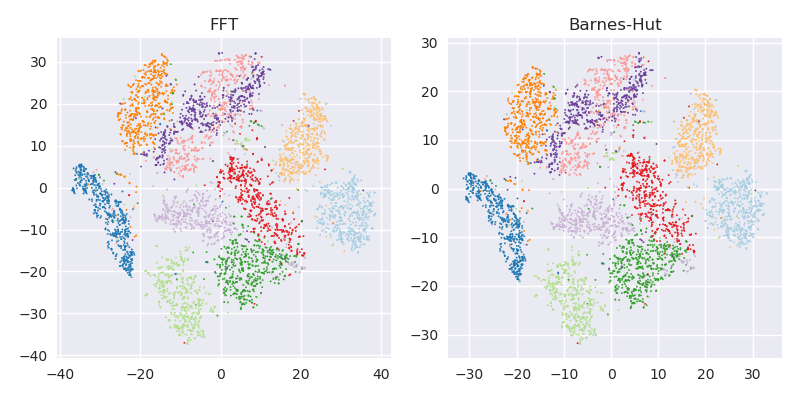

In [6]:
Z1 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:])

Z2 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:], nbody_algo='Barnes-Hut')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('FFT')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('Barnes-Hut')
plt.tight_layout()

### Exact t-SNE

<IPython.core.display.Javascript object>


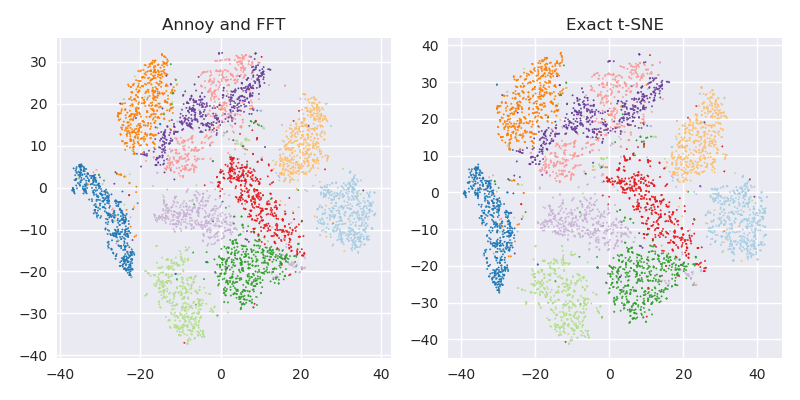

In [11]:
Z1 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:])

Z2 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:], theta=0)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Annoy and FFT')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('Exact t-SNE')
plt.tight_layout()

### Loading and saving input similarities

<IPython.core.display.Javascript object>


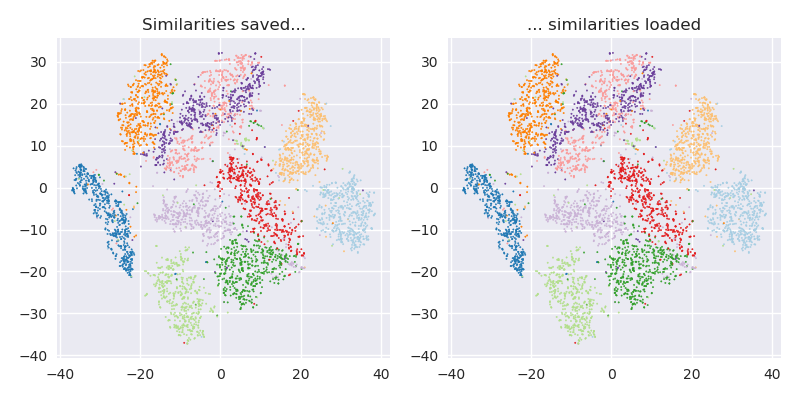

<IPython.core.display.Javascript object>


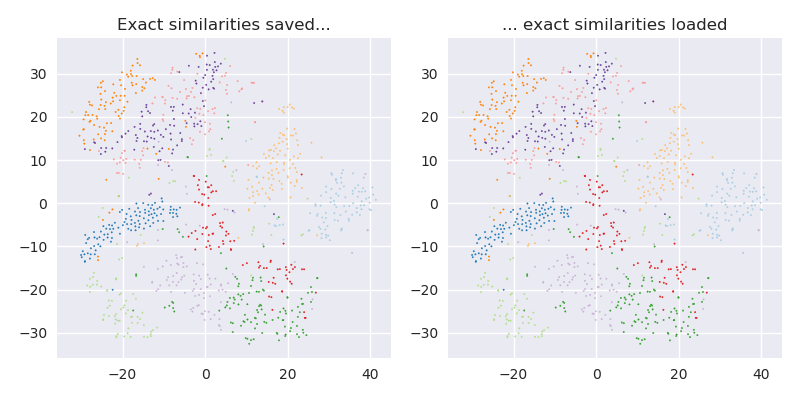

In [12]:
Z1 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:], load_affinities = 'save')

Z2 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:], load_affinities = 'load')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Similarities saved...')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('... similarities loaded')
plt.tight_layout()

# And now for the exact t-SNE

Z1 = fast_tsne.fast_tsne(X50[ind1k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind1k,:], theta=0, load_affinities = 'save')

Z2 = fast_tsne.fast_tsne(X50[ind1k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind1k,:], theta=0, load_affinities = 'load')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind1k]], s=1)
plt.title('Exact similarities saved...')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind1k]], s=1)
plt.title('... exact similarities loaded')
plt.tight_layout()

### Fixed sigma instead of perplexity

<IPython.core.display.Javascript object>


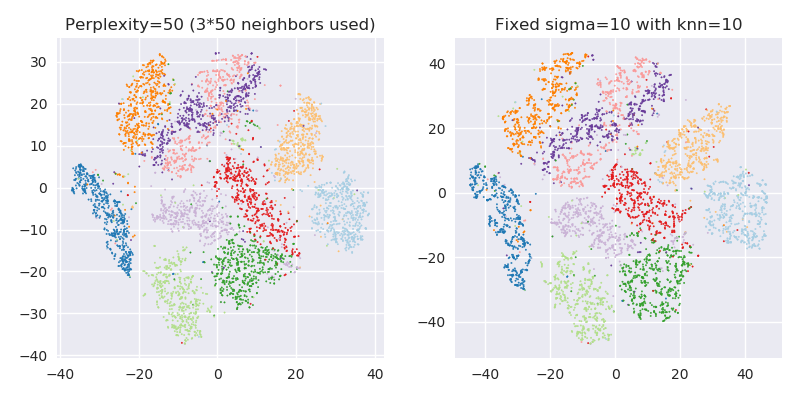

In [21]:
Z1 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=50, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:])

Z2 = fast_tsne.fast_tsne(X50[ind5k,:], perplexity=-1, max_iter=500, early_exag_coeff=4, stop_lying_iter=100,
                        initialization=PCAinit[ind5k,:], sigma = 10, K=10)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind5k]], s=1)
plt.title('Perplexity=50 (3*50 neighbors used)')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind5k]], s=1)
plt.title('Fixed sigma=10 with knn=10')
plt.tight_layout()